In [1]:
from konlpy.tag import Okt
tokenizer = Okt()

text1 = "금리 하락은 부동산 상승을 야기한다"
text2 = "금리 하락은 주가 상승을 야기한다"
text3 = "금리 상승은 예금을 증가시킨다"
text4 = "금리 상승은 경제회복의 조짐이다"
text5 = "금리 하락은 소비와 대출을 촉진한다"
text6 = "급격한 금리 상승은 기업에 부담이 된다"
text7 = "대한민국의 금리는 한국은행 금융통화위원회가 결정한다."

In [2]:
# bow는 편리하긴 하지만, 좋은 솔루션은 아니다.
bow = ['금리','상승','하락','부동산','주가','상승','경제','대출','기업']

In [16]:
tokens = tokenizer.morphs(text1)
print(tokens)

['금리', '하락', '은', '부동산', '상승', '을', '야기', '한다']


In [4]:
word_to_index = {}

for token in tokens:
    if token not in word_to_index.keys():
        word_to_index[token] = len(word_to_index)

print(word_to_index)

{'금리': 0, '하락': 1, '은': 2, '부동산': 3, '상승': 4, '을': 5, '야기': 6, '한다': 7}


In [5]:
def convert_bow(sentence, word_to_index):
    
    vector =[0]*(len(word_to_index))   # [0, 0, 0, 0, 0, 0, 0, 0]
    
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    for token in tokens:
        if token in word_to_index.keys():
            vector[word_to_index[token]] +=1
            
    return vector

print(word_to_index)
print(text1, end=': ')
print(convert_bow(text1, word_to_index))
print(text2, end=': ')
print(convert_bow(text2, word_to_index))
print(text3, end=': ')
print(convert_bow(text3, word_to_index))
print(text4, end=': ')
print(convert_bow(text4, word_to_index))
print(text5, end=': ')
print(convert_bow(text4, word_to_index))
print(text6, end=': ')
print(convert_bow(text4, word_to_index))
print(text7, end=': ')
print(convert_bow(text4, word_to_index))


{'금리': 0, '하락': 1, '은': 2, '부동산': 3, '상승': 4, '을': 5, '야기': 6, '한다': 7}
금리 하락은 부동산 상승을 야기한다: [1, 1, 1, 1, 1, 1, 1, 1]
금리 하락은 주가 상승을 야기한다: [1, 1, 1, 0, 1, 1, 1, 1]
금리 상승은 예금을 증가시킨다: [1, 0, 1, 0, 1, 1, 0, 0]
금리 상승은 경제회복의 조짐이다: [1, 0, 1, 0, 1, 0, 0, 0]
금리 하락은 소비와 대출을 촉진한다: [1, 0, 1, 0, 1, 0, 0, 0]
급격한 금리 상승은 기업에 부담이 된다: [1, 0, 1, 0, 1, 0, 0, 0]
대한민국의 금리는 한국은행 금융통화위원회가 결정한다.: [1, 0, 1, 0, 1, 0, 0, 0]


In [6]:
sentence = " ".join(tokens)
sentence

'금리 하락 은 부동산 상승 을 야기 한다'

In [7]:
sentences = []
sentences.append(sentence)

print(sentences)

['금리 하락 은 부동산 상승 을 야기 한다']


In [18]:
from sklearn.feature_extraction.text import CountVectorizer  # Bow 를 만들기 위해서, CouontVectorizer를 쓴다.

# 1글자도 인식이 되도록 토큰 패턴 변경
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b") # \d 숫자 \w 워드
cv.fit(sentences)

print(cv.vocabulary_) # vocabulary_ : 순서가 바뀌기는 했지만, 토큰이 들어오면 그거를 분리해서 인덱싱을 해준다.


{'금리': 0, '하락': 6, '은': 4, '부동산': 1, '상승': 2, '을': 5, '야기': 3, '한다': 7}


In [9]:
# CountVectorizer로 변환
def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
    sentence = " ".join(tokens)
    
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector

In [10]:
print(text1)
print(text2)
print(text3)
print(text4)
print(text5)
print(text6)
print(text7)

금리 하락은 부동산 상승을 야기한다
금리 하락은 주가 상승을 야기한다
금리 상승은 예금을 증가시킨다
금리 상승은 경제회복의 조짐이다
금리 하락은 소비와 대출을 촉진한다
급격한 금리 상승은 기업에 부담이 된다
대한민국의 금리는 한국은행 금융통화위원회가 결정한다.


In [11]:
print(convert_cv(text1, cv)) # Bow에 매칭이 되겠금, array로 나온다.
print(convert_cv(text2, cv))
print(convert_cv(text3, cv))
print(convert_cv(text4, cv))
print(convert_cv(text5, cv))
print(convert_cv(text6, cv))
print(convert_cv(text7, cv))

[[1 1 1 1 1 1 1 1]]
[[1 0 1 1 1 1 1 1]]
[[1 0 1 0 1 1 0 0]]
[[1 0 1 0 1 0 0 0]]
[[1 0 0 0 1 1 1 1]]
[[1 0 1 0 1 0 0 0]]
[[1 0 0 0 0 0 0 1]]


In [12]:
# 코사인 시밀리러티를 통해서, 문장간이 얼마나 유사한지 확인할 수 있다.
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

print(cos_sim(convert_cv(text1, cv)[0], convert_cv(text3, cv)[0]))

0.7071067811865475


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(convert_cv(text2, cv), convert_cv(text7, cv))
cosine_sim

array([[0.53452248]])

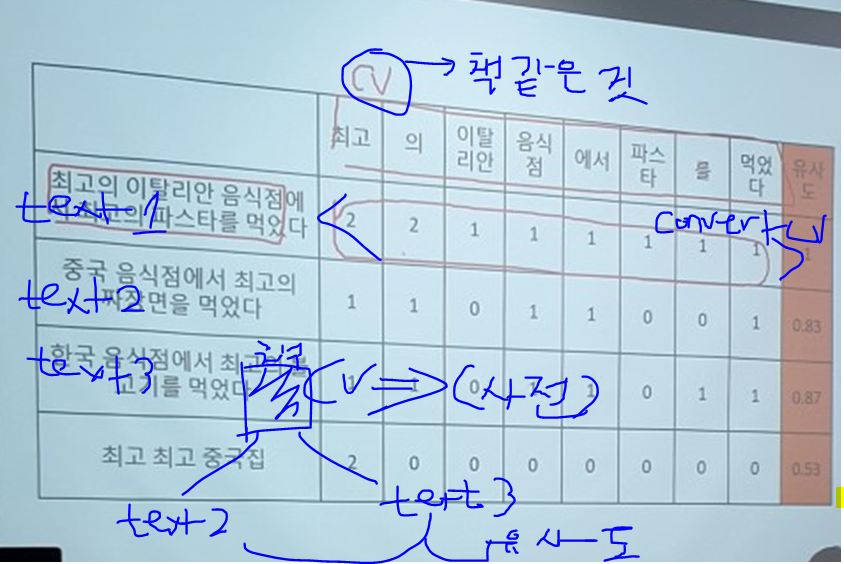